<div style="text-align: center; margin: 50px">

<h1 style="color: white; background-color: grey; text-align: center;">Week 3, Days 3 and 4</h1>
<h3>Quantum Key Distribution</h3>

</div>

In [7]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_textbook.tools import array_to_latex

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

from random import getrandbits


## Coding cheat sheet:

#Defining a quantum circuit: 

`qc = QuantumCircuit(1)` #Define a 1 qubit quantum circuit <br>

`qc.x(0)` #Add an X gate <br>
`qc.h(0)` #Add an H gate <br>
`qc.z(0)` #Add a Z gate <br>
`qc.y(0)` #Add a Y gate <br>

`qc.draw()` #Draw the circuit <br>

**Using the statevector simulator** (Do this no matter which way you want to see the output):<br>

`svsim = Aer.get_backend('statevector_simulator')` # Tell it which simulator you want to use <br>
`job = execute(qc,svsim)` # Put in the name of your quantum circuit where it says qc<br>
`result = job.result()` <br>


See the output on the Bloch sphere:<br>
`state = result.get_statevector()` <br>
`plot_bloch_multivector(state)`<br>

See the output in vector form:<br>
`state = result.get_statevector()` <br>
`array_to_latex(state, pretext="\\text{Statevector} = ")` <br>

See the output in histogram form: <br>
`counts = result.get_counts(qc)` <br>
`plot_histogram(counts)` <br>

**Using the qasm simulator:**

`qc.measure_all()` #adds measurements <br>

`svsim = Aer.get_backend('qasm_simulator')` # Change statevector to qasm <br>
`job = execute(qc,svsim,shots=100)` # add shots - tell it how many times to run <br>
`result = job.result()` <br>


**Using a real quantum computer:**

Find the least busy backend: <br>
`IBMQ.load_account()` <br>
`provider = IBMQ.get_provider(hub='ibm-q')` <br>
`backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))` <br>
`print("least busy backend: ", backend)` <br>


Run the job:
`job = execute(qc, backend=backend, shots=100)`

`result = job.result()` <br>
`counts = result.get_counts(qc)` <br>
`plot_histogram(counts)` 





<a id="step1"></a>
## Step 1 - Alice randomly chooses bits


In [8]:
#BLOCK 1 - try out the getrandbits function
getrandbits(1)

0

In [9]:
# BLOCK 2 - Generate Alice's bitstring

alice_bitstring = ""
    
# Make alice_bitstring have 500 random bits
for i in range(500):
    alice_bitstring += str(getrandbits(1))
alice_bitstring



'11100101100000100011001101101000101000100000011101110000110101101011000111001011111111101101110101010111000110011011111101111101111100110001111000010111110011000110100100000111110010110110010101101100101101001000110001110111001011100110010010011010010011000010110101011011001001111101000000011000010010100100000011011110110110000111111000101000111101101111101110100100001101100110100111110010010111000111010011000100011001101010000110011011111100100110001100000111010100011010000110110001001011000000'

## Step 2 - Alice randomly chooses bases

In [10]:
# BLOCK 3 - Generate Alice's bases

alice_bases = ""
for i in range(500):
    alice_bases += str(getrandbits(1))
        

# Make alice_bases have 500 random bits
alice_bases

'11010111100100001011111101110010010011010101000011111100111000000101111011010000010110101111110110100111001010011001001000000110111110100100011011111101100101100111001000010111110110010111100111000010000001110011010100100110101110100101000100010011011111100101101010110010111000101111000011101011101111111100001011110011010100010010111000011011101110111000101111101001011100100010011010110110000011001100101101110110111111000101000111010101010110111010000001010100010100000101110011100110110111001010'

<a id="step3"></a>
## Step 3 - Encode the classical bits into qubits


The table below summarizes the qubit states Alice sends, based on the bit of Alice's `alice_bitstring` the corresponding bit of `selected_bases`:

| Bit in `alice_bitstring` | Corresponding bit in `alice_bases` | Encoding basis | Qubit state sent |
|:----------------:|:--------------------------:|:--------------------------:|:---------------:|
| 0 | 0 | $$|0\rangle,|1\rangle$$ |$$|0\rangle$$ |
| 0 | 1 | $$|+\rangle,|-\rangle$$ |$$|+\rangle$$ |
| 1 | 0 | $$|0\rangle,|1\rangle$$ |$$|1\rangle$$ |
| 1 | 1 | $$|+\rangle,|-\rangle$$ |$$|-\rangle$$ |

In [11]:
#BLOCK 4 - Define a function to encode Alice's qubits                   
                   
def encode(alice_bitstring, alice_bases): # Add inputs
    encoded_qubits = []
    # Add a for loop to go through our 500 bits/basis
    for i in range(500):
        qc = QuantumCircuit(1)
# Add conditionals for each bit/basis case
        if alice_bases[i] == "0":
            if alice_bitstring[i] == "0":
                pass
            elif alice_bitstring[i] == "1":
                qc.x(0)
# Make a new quantum circuit for each element

        elif alice_bases[i] == "1":
            if alice_bitstring[i] == "0":
                qc.h(0)
            elif alice_bitstring[i] == "1":
                qc.x(0)
                qc.h(0)
# Append the circuit to encoded_qubits
        encoded_qubits.append(qc) 
        
    return encoded_qubits


1
1


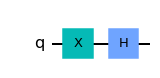

In [12]:
# BLOCK 5  - call the encode function to create the encoded qubits

qubits = encode(alice_bitstring, alice_bases)
print(alice_bitstring[1])
print(alice_bases[1])
qubits[1].draw()

# Step 4 - Alice sends qubits to Bob

### There's nothing we need to code here. Alice would send the qubits to Bob (maybe through a fiber optic cable)

# Step 5 - Bob randomly picks the bases he will use to measure Alice's qubits


In [13]:
#BLOCK 6  - generate Bob's bases

bob_bases = ""
    
for i in range(500):
    bob_bases += str(getrandbits(1))

bob_bases



'10111100001100111000000111101101110101111000110100011001000110111000011111101100111001111011011100111111100101001010111000010110110010111101111000110111111111000001010010010000101100011100010011100010000111011011111101010110111000110000010010110100110111011000001010101110000101101001001001010000101010101011000011011000001100001011101110000001100001110111001110010100001111110110000111011011110101101110110101101111111000001011011101110010100111111000000001000010010110100001110011100100000110100011'

## Step 6 & 7 - Bob makes measurements and converts qubits into bits

Bob now has to measure the qubits in a the random bases that he chose in part 2

In [27]:
#BLOCK 7 - define a function to measure Alice's qubits

def measure(bob_bases, encoded_qubits):
    
    # Create a list to store the measurements
    bob_bitstring = ''
    
    # Add a for loop to go through our bitstrings
    for i in range(len(encoded_qubits)):
        qc = encoded_qubits[i]

        # Add conditionals for our measurement cases
        if bob_bases[i] == "0":
            qc.measure_all()
            
        elif bob_bases[i] == "1":
            qc.h(0)
            qc.measure_all()

        
        # Now that the measurements have been added to the circuit, let's run them.
        job = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots = 1) 
        results = job.result()
        counts = results.get_counts()
        measured_bit = max(counts, key=counts.get)

        # Append measured bit to Bob's measured bitstring
        bob_bitstring += measured_bit
        
        
    return bob_bitstring


In [28]:
# BLOCK 8 - call the measure function

bob_bitstring = measure(bob_bases, qubits)
bob_bitstring

'11100110001000110000111101100111101100001101111000110101011101111011000111111111011100111101011101001111000100011000111101111101111100111000011001011101101011000000110100000100111000111110110001101100101001001000111001110111001011100010010100011000110011000011010101010011010000111111000000111001010110110111000011011110110110010110101000111000110100101010001110110001011101110110110111010010000001100111001011000100011010100010011110011010001101100110001100010001010110111110000110110011001010101000'

## Step 8 - Alice and Bob compare their bases

In [33]:
#BLOCK 9 - Define a function for Alice and Bob to compare their bases

def compare_bases(alice_bases, bob_bases): # Add the inputs
    indices = []
    
    for i in range(len(alice_bases)):
        # Append the index if the bases are the same
        if alice_bases[i] == bob_bases[i]:
            indices.append(i)
        
    return indices

In [34]:
#BLOCK 10  - call the function to find the agreeing bases

agreeing_bases = compare_bases(alice_bases, bob_bases)
len(agreeing_bases)

256

## Step 9 - Alice and Bob generate their key


In [35]:
#BLOCK 11 - create Alice's key

alice_key = ''
for index in agreeing_bases:
    alice_key = alice_key + alice_bitstring[index]
    
print(alice_key)


1010000001110100011001100111111101111011100101101111011100100110011110100011000010011100101100101100001000111011101000111011110101011011110000001011000011111110011110100111001110011101011110100110011010011100010111101001000110000101010111000011011001101000


In [37]:
#BLOCK 12 - create Bob's key
bob_key = ''
for index in agreeing_bases:
    bob_key = bob_key + bob_bitstring[index]
print(bob_key)


1010000001110100011001100111111101111011100101101111011100100110011110100011000010011100101100101100001000111011101000111011110101011011110000001011000011111110011110100111001110011101011110100110011010011100010111101001000110000101010111000011011001101000


In [38]:
#BLOCK 13 - we can see that these keys are the same
print(alice_key[:10])
print(bob_key[:10])
print(alice_key == bob_key)


1010000001
1010000001
True


## Optional content - Encrypting and decrypting messages

In [39]:
# BLOCK 14

import binascii

def encrypt_message(unencrypted_string, key):
    # Convert ascii string to binary string
    bits = bin(int(binascii.hexlify(unencrypted_string.encode('utf-8', 'surrogatepass')), 16))[2:]
    bitstring = bits.zfill(8 * ((len(bits) + 7) // 8))
    # created the encrypted string using the key
    encrypted_string = ""
    for i in range(len(bitstring)):
        encrypted_string += str( (int(bitstring[i])^ int(key[i])) )
    return encrypted_string
    
def decrypt_message(encrypted_bits, key):
    # created the unencrypted string using the key
    unencrypted_bits = ""
    for i in range(len(encrypted_bits)):
        unencrypted_bits += str( (int(encrypted_bits[i])^ int(key[i])) )
    # Convert bitstring into
    i = int(unencrypted_bits, 2)
    hex_string = '%x' % i
    n = len(hex_string)
    bits = binascii.unhexlify(hex_string.zfill(n + (n & 1)))
    unencrypted_string = bits.decode('utf-8', 'surrogatepass')
    return unencrypted_string

In [40]:
# BLOCK 15

message = "QKD is cool!"
print("Original Messge:", message)
encrypted_message = encrypt_message(message, alice_key)
print("Encrypted message:", encrypted_message)
decrypted_message = decrypt_message(encrypted_message, bob_key)
print("Decrypted message:", decrypted_message)

Original Messge: QKD is cool!
Encrypted message: 111100010011111100100010010111110001001011100101110101110100010100010101010111111111000010010011
Decrypted message: QKD is cool!
